# 4.10

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting path

path = r'D:\Johnny\Instacart Basket Analysis'

In [3]:
# Importing 'df_merged.pkl'

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged.pkl'))

In [4]:
# Data check

df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'median_freq', 'order_freq_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [6]:
# PII information is present, will be addressed.

df_merged = df_merged.drop(columns = ['first_name', 'last_name'])

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [7]:
# Creating regional segmentation (list)

region = []

In [8]:
# Assigning regions to states

for value in df_merged['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else :
        region.append('West')

In [9]:
# Adding region to 'df.merged'

df_merged['region'] = region

In [10]:
# Data check

df_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
# Data check

df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


#### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [12]:
# Calculating the average price for each user in the dataframe and assigning it to a new column

df_merged['average_price'] = df_merged.groupby(['user_id'])['prices'].transform(np.mean)

In [13]:
# Data check

df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,average_price
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797


In [14]:
# Creating flag (Low spender)

df_merged.loc[df_merged['average_price'] <10, 'spending_flag'] = 'Low spender'

In [15]:
# Creating flag (High spender)

df_merged.loc[df_merged['average_price'] >= 10, 'spending_flag'] = 'High spender'

In [16]:
# Data check

df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,average_price,spending_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender


In [17]:
# Creating crosstab between 'region' and 'spending_flag'

crosstab_spending_region = pd.crosstab(df_merged['region'], df_merged['spending_flag'], dropna = False)

In [18]:
# Data check

crosstab_spending_region

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


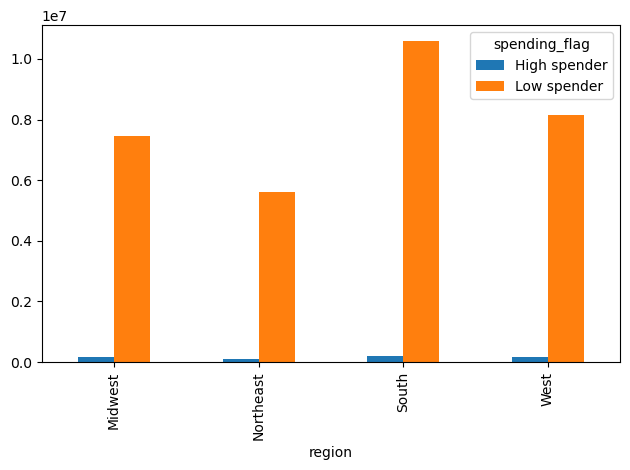

In [19]:
# Creating visual

bar_spending_region = crosstab_spending_region.plot.bar()
plt.tight_layout()

In [20]:
# Exporting

bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spending_region.png'))

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# Creating exclusion flags (<5)

df_merged.loc[df_merged['max_order'] <5, 'order_flag'] = 'Low-activity customer'


In [22]:
# Creating exclusion flags (>=5)

df_merged.loc[df_merged['max_order'] >=5, 'order_flag'] = 'High-activity customer'

In [23]:
df_merged['order_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: order_flag, dtype: int64

In [24]:
# Creating sample

high_activity_customers = df_merged[df_merged['order_flag'] == 'High-activity customer']

In [25]:
# Data check

high_activity_customers.shape

(30964564, 31)

In [26]:
# Exporting

high_activity_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Age Profile

In [27]:
# Creating age profiles

df_merged.loc[df_merged['age'] <= 40, 'age_profile'] = 'Young'
df_merged.loc[((df_merged['age'] > 40) & (df_merged['age'] < 65)), 'age_profile'] = 'Middle-aged'
df_merged.loc[df_merged['age'] >= 65, 'age_profile'] = 'Senior'

In [28]:
# Data checks

df_merged['age_profile'].value_counts(dropna = False)

Middle-aged    12159729
Young          11670046
Senior          8575084
Name: age_profile, dtype: int64

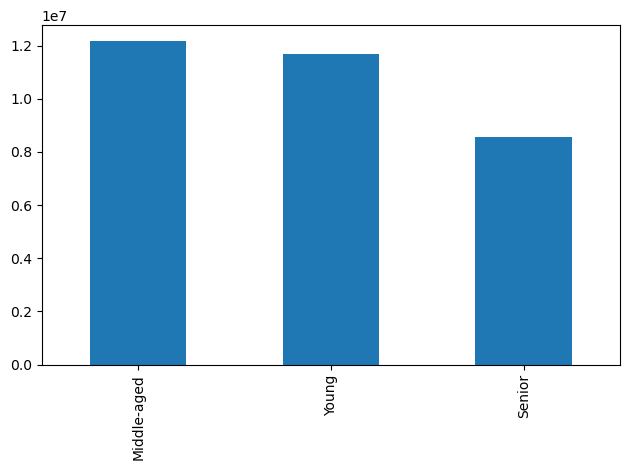

In [29]:
# Creating visual

bar_age_profile = df_merged['age_profile'].value_counts().plot.bar()
plt.tight_layout()

In [30]:
# Exporting

bar_age_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'))

#### Income Profile

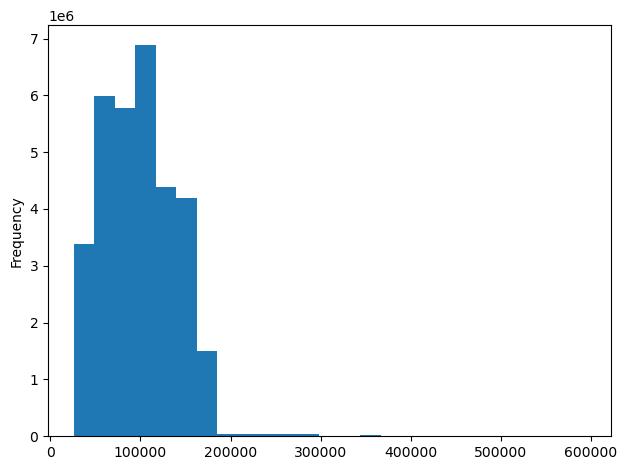

In [31]:
# Creating income distribution visual 

hist_income = df_merged['income'].plot.hist(bins = 25)
plt.tight_layout()

In [32]:
# Exporting

hist_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income.png'))

In [33]:
# Creating income profile

df_merged.loc[df_merged['income'] <75000, 'income_profile'] = 'Low income'
df_merged.loc[(df_merged['income'] >= 75000) & (df_merged['income'] < 125000), 'income_profile'] = 'Mid income'
df_merged.loc[df_merged['income'] >= 125000, 'income_profile'] = 'High income'

In [34]:
# Data check

df_merged['income_profile'].value_counts(dropna = False)

Mid income     13331136
Low income     10442766
High income     8630957
Name: income_profile, dtype: int64

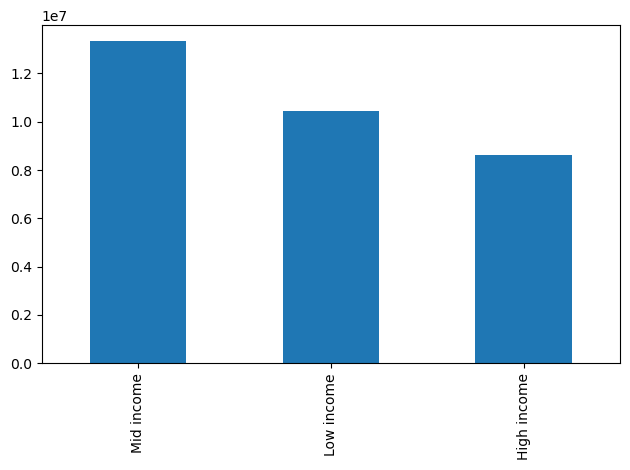

In [35]:
# Creating visual 

bar_income_profile = df_merged['income_profile'].value_counts().plot.bar()
plt.tight_layout()

In [36]:
# Exporting

bar_income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

#### Diet Profile

In [39]:
# Creating diet profiles (vegan, vegetarian, non-vegetarian)

department_user_crosstab = pd.crosstab(df_merged['department_id'], df_merged['user_id'], dropna = False)

In [40]:
# Creating dictionary, assignining dietary classifications

diet_dict = dict()
for user in department_user_crosstab:
    diet_list = department_user_crosstab[user].tolist()
    if diet_list[11] == 0 and diet_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif diet_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-vegetarian'

In [48]:
# Assigning flags

diet_flag = []
for user in df_merged['user_id']:
    diet_flag.append(diet_dict[user])

In [50]:
# Assigning values

df_merged['diet'] = diet_flag

In [51]:
# Data check

df_merged['diet'].value_counts(dropna = False)

Non-vegetarian    23762619
Vegetarian         8258813
Vegan               383427
Name: diet, dtype: int64

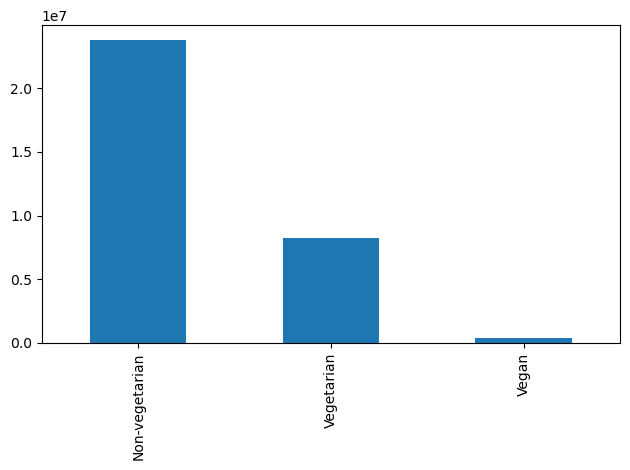

In [52]:
# Creating visual

bar_diet_profile = df_merged['diet'].value_counts().plot.bar()
#plt.tight_layout()

In [53]:
# Exporting visual

bar_diet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile.png'))

#### Marital Status/Family Profile

In [55]:
# Counting occurrences (unique)

df_merged['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [56]:
# Creating crosstab between 'marital_status' and 'number_of_dependants' columns

family_crosstab = pd.crosstab(df_merged['marital_status'], df_merged['number_of_dependants'], dropna = False)

In [57]:
# Data check

family_crosstab

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [58]:
# Creating classifications based on number of dependants

df_merged.loc[(df_merged['number_of_dependants'] == 0), 'dependants'] = 'No dependants'
df_merged.loc[(df_merged['number_of_dependants'] >= 1), 'dependants'] = 'Has dependants'

In [60]:
# Data check

df_merged['dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: dependants, dtype: int64

In [61]:
# Data check

df_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,region,average_price,spending_flag,order_flag,age_profile,income_profile,diet,dependants
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,6.367797,Low spender,High-activity customer,Young,Low income,Vegetarian,Has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,6.367797,Low spender,High-activity customer,Young,Low income,Vegetarian,Has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,6.367797,Low spender,High-activity customer,Young,Low income,Vegetarian,Has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,6.367797,Low spender,High-activity customer,Young,Low income,Vegetarian,Has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,6.367797,Low spender,High-activity customer,Young,Low income,Vegetarian,Has dependants


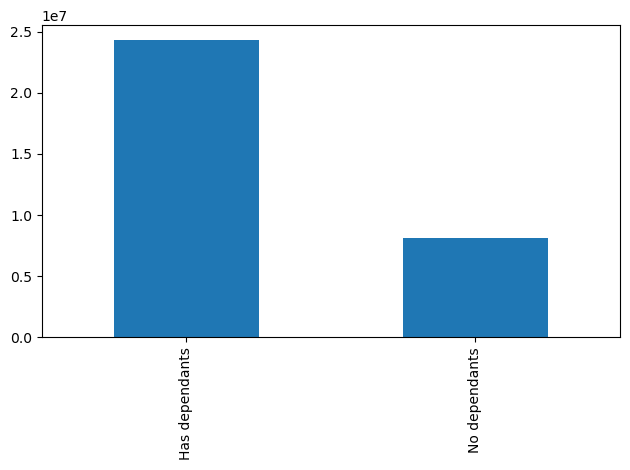

In [62]:
# Creating visual

bar_dependants_profile = df_merged['dependants'].value_counts().plot.bar()
plt.tight_layout()

In [63]:
# Exporting visual

bar_dependants_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_profile.png'))

#### Alcohol Consumption Profile 

In [65]:
# Creating dictionary and assigning values

alcohol_dict = dict()
for user in department_user_crosstab:
    workinglist = department_user_crosstab[user].tolist()
    if workinglist[4] == 0 :     
        alcohol_dict[user] = 'Does not drink'
    else:
        alcohol_dict[user] = 'Consumes alcohol'

In [67]:
# Assigning flags

alcohol_flag = []
for user in df_merged['user_id']:
    alcohol_flag.append(alcohol_dict[user])

In [68]:
# Adding new column, assigning flags

df_merged['alcohol_consumption'] = alcohol_flag

In [69]:
# Data check (counts)

df_merged['alcohol_consumption'].value_counts(dropna = False)

Does not drink      29991046
Consumes alcohol     2413813
Name: alcohol_consumption, dtype: int64

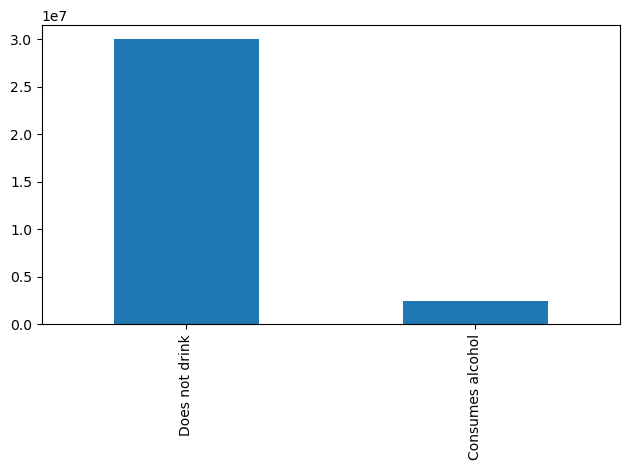

In [70]:
# Creating visual

bar_alcohol_profile = df_merged['alcohol_consumption'].value_counts().plot.bar()
plt.tight_layout()

In [71]:
# Exporting visual

bar_alcohol_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_alcohol_profile.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [73]:
# Replacing prices greater than 100 with NaN in the 'prices' column

df_merged.loc[df_merged['prices'] > 100, 'prices'] = np.nan

#### Descriptive statistics, age profile

In [82]:
df_merged.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
Middle-aged              11.116537  30.0  0.0  7.791341  25.0  1.0
Senior                   11.078641  30.0  0.0  7.796546  25.0  1.0
Young                    11.109790  30.0  0.0  7.786553  25.0  1.0

#### Descriptive statistics, income profile

In [83]:
df_merged.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
High income                 11.024072  30.0  0.0  7.957172  25.0  1.0
Low income                  11.240514  30.0  0.0  7.434729  25.0  1.0
Mid income                  11.049451  30.0  0.0  7.962545  25.0  1.0

#### Descriptive statistics, diet profile

In [84]:
df_merged.groupby('diet').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
diet                                                                 
Non-vegetarian              10.762605  30.0  0.0  7.905951  25.0  1.0
Vegan                       14.749275  30.0  0.0  7.009920  20.0  1.0
Vegetarian                  11.952600  30.0  0.0  7.496501  20.0  1.0

#### Descriptive statistics, family profile

In [85]:
df_merged.groupby('dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
dependants                                                           
Has dependants              11.111834  30.0  0.0  7.791334  25.0  1.0
No dependants               11.080805  30.0  0.0  7.789975  25.0  1.0

#### Descriptive statistics, alcohol consumption profile

In [87]:
df_merged.groupby('alcohol_consumption').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                      mean   max  min      mean   max  min
alcohol_consumption                                                       
Consumes alcohol                 10.885580  30.0  0.0  7.781196  25.0  1.0
Does not drink                   11.121688  30.0  0.0  7.791782  25.0  1.0

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Customer profiles by regions

#### Age

In [88]:
# Creating crosstab on 'age_profile' and 'region' columns

cross_age_region = pd.crosstab(df_merged['age_profile'], df_merged['region'], normalize = 'columns')

In [89]:
# Data check

cross_age_region

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.380661,0.370974,0.371166,0.378535
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.357294,0.357495,0.366020,0.356892


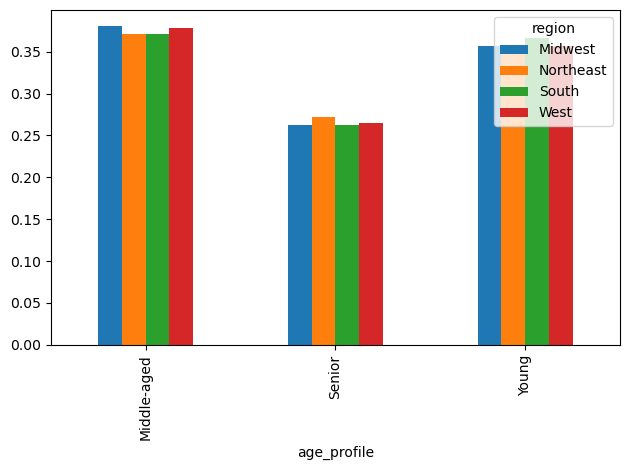

In [90]:
# Creating visual

bar_age_region = cross_age_region.plot.bar()
plt.tight_layout()

In [91]:
# Exporting visual

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))

#### Income

In [92]:
# Creating crosstab on 'income_profile' and 'region' columns

cross_income_region = pd.crosstab(df_merged['income_profile'], df_merged['region'], normalize = 'columns')

In [93]:
# Data check

cross_income_region

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.270318,0.268977,0.262824,0.265481
Low income,0.319571,0.318405,0.323667,0.325550
Mid income,0.410111,0.412618,0.413510,0.408968


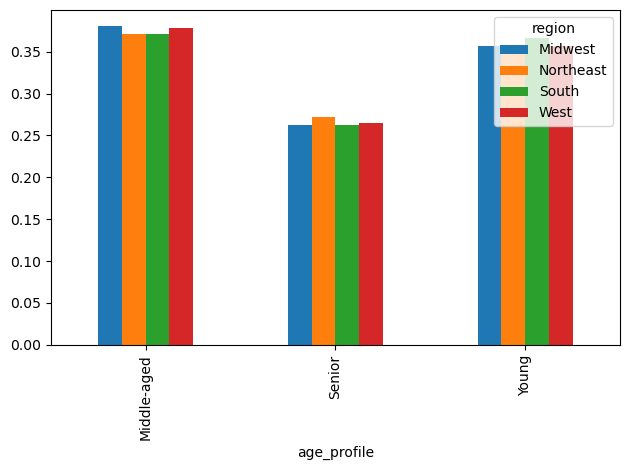

In [94]:
# Creating visual

cross_income_region = cross_age_region.plot.bar()
plt.tight_layout()

In [96]:
# Exporting visual 

cross_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))

#### Diet

In [97]:
# Creating crosstab on 'diet' and 'region' columns

cross_diet_region = pd.crosstab(df_merged['diet'], df_merged['region'], normalize = 'columns')

In [98]:
# Data check

cross_diet_region

region,Midwest,Northeast,South,West
diet,,,,
Non-vegetarian,0.730808,0.734091,0.733396,0.734928
Vegan,0.011885,0.011841,0.011611,0.012066
Vegetarian,0.257307,0.254068,0.254993,0.253005


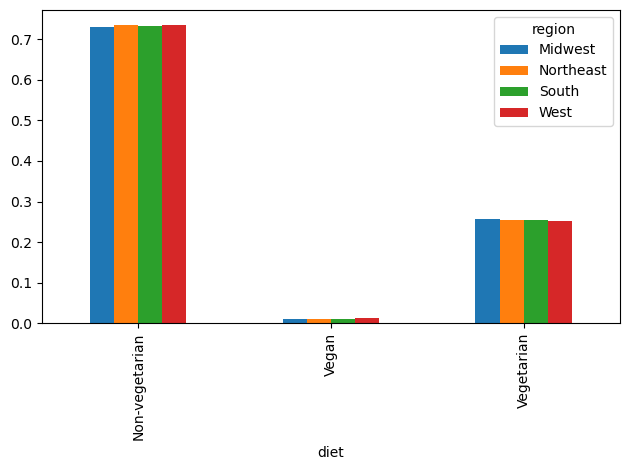

In [99]:
# Creating visual

bar_diet_region = cross_diet_region.plot.bar()
plt.tight_layout()

In [100]:
# Exporting visual

bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_region.png'))

#### Family

In [101]:
# Creating crosstab on 'dependants' and 'region' columns

cross_dependants_region = pd.crosstab(df_merged['dependants'], df_merged['region'], normalize = 'columns')

In [102]:
# Data check

cross_dependants_region

region,Midwest,Northeast,South,West
dependants,,,,
Has dependants,0.749228,0.752164,0.749658,0.750107
No dependants,0.250772,0.247836,0.250342,0.249893


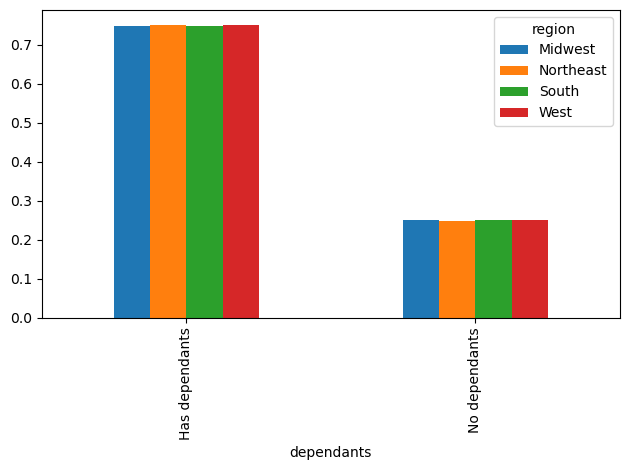

In [103]:
# Creating visual

bar_dependants_region = cross_dependants_region.plot.bar()
plt.tight_layout()

In [104]:
# Exporting visual

bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_region.png'))

#### Alcohol

In [105]:
# Creating crosstab on 'alcohol_consumption' and 'region' columns

cross_alcohol_region = pd.crosstab(df_merged['alcohol_consumption'], df_merged['region'], normalize = 'columns')

In [106]:
# Data check

cross_alcohol_region

region,Midwest,Northeast,South,West
alcohol_consumption,,,,
Consumes alcohol,0.074512,0.071097,0.075312,0.075738
Does not drink,0.925488,0.928903,0.924688,0.924262


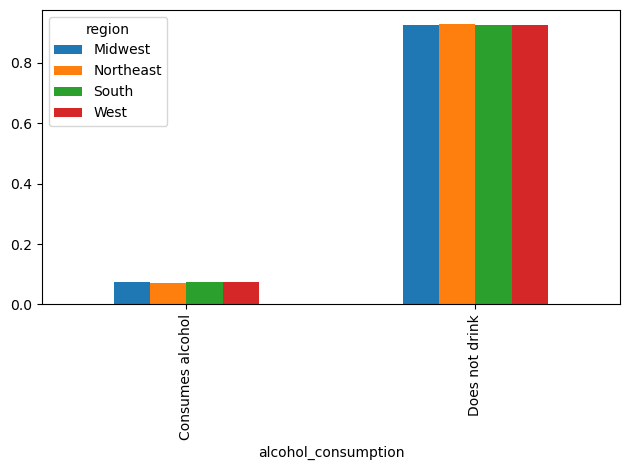

In [107]:
# Creating visual

bar_alcohol_region = cross_alcohol_region.plot.bar()
plt.tight_layout()

In [108]:
# Exporting visual

bar_alcohol_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_alcohol_region.png'))

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [ ]:
# Done

### 10. Tidy up your script, export your final data set, and save your notebook.

In [ ]:
# Done